In [1]:
%load_ext watermark
%watermark -a 'cs224' -u -d -v -p numpy,scipy,pandas,matplotlib,seaborn

cs224 
last updated: 2020-05-03 

CPython 3.6.10
IPython 7.13.0

numpy 1.18.1
scipy 1.4.1
pandas 1.0.2
matplotlib 3.1.3
seaborn 0.10.0


In [2]:
import numpy as np, scipy, scipy.stats as stats, scipy.special, scipy.misc, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import matplotlib as mpl

sns.set()

from IPython.display import display, HTML

display(HTML("<style>.container { width:70% !important; }</style>"))

import os,sys
sys.path.append(os.path.dirname(os.path.realpath('.')))

In [3]:
%load_ext autoreload
%autoreload 1
%aimport covid19

# Case Fatality Rate (CFR)

[Zahlen, bitte! 3,4 % Coronavirus-Fallsterblichkeit, eine "false Number"? Etwas Pandemie-Statistik](https://www.heise.de/newsticker/meldung/Zahlen-bitte-3-4-Coronavirus-Fallsterblichkeit-False-Number-4679338.html?seite=all)

## Crude CFR

In [4]:
df_co = covid19.get_country_overview()
df_co[df_co.confirmed > 15000].round(1)

,confirmed,recovered,death,death_rate,death_rate_
Country/Region_2020-05-02,,,,,
Belgium,49517,12211,7765,15.7,38.9
United Kingdom,183500,896,28205,15.4,96.9
France,168518,50663,24763,14.7,32.8
Italy,209328,79914,28710,13.7,26.4
Netherlands,40434,138,5003,12.4,97.3
Sweden,22082,1005,2669,12.1,72.6
Spain,216582,117248,25100,11.6,17.6
Mexico,22088,12377,2061,9.3,14.3
Brazil,97100,40937,6761,7.0,14.2


## CFR by looking at Cohort

In [5]:
alternative_germany_data = covid19.get_rki_df(replace_death=False)
alternative_germany_data.tail()

,confirmed,recovered,death,new_confirmed,new_recovered,new_death
index,,,,,,
2020-04-28,160085,130531,6638,896,0,10
2020-04-29,160963,130531,6639,878,0,1
2020-04-30,161805,130531,6645,842,0,6
2020-05-01,162249,130531,6647,444,0,2
2020-05-02,162473,130531,6648,224,0,1


In [6]:
ldf = alternative_germany_data[alternative_germany_data.index < pd.to_datetime('2020-04-20')]
ldf.tail()

,confirmed,recovered,death,new_confirmed,new_recovered,new_death
index,,,,,,
2020-04-15,141259,126076,6086,2283,1399,110
2020-04-16,143484,127368,6166,2225,1292,80
2020-04-17,145759,128722,6256,2275,1354,90
2020-04-18,147384,129724,6306,1625,1002,50
2020-04-19,148685,130467,6370,1301,743,64


In [7]:
last_row = ldf.iloc[-1]
round(last_row.death / last_row.confirmed * 100.0,1)

4.3

## CFR: Via Shift and Scale

[Markus Noga](https://www.linkedin.com/in/mlnoga/)'s (SAP: AI and cloud thought leader) [covid19-analysis](https://mlnoga.github.io/covid19-analysis/)

In [8]:
df = covid19.get_cases_by_region(region='Germany')
df = df[df.index < pd.to_datetime('2020-05-02')]

 /home/local/cs/workspaces/covid-19-data-analysis/covid19.py:1517: UserWarning:Exception in curve_fit: Optimal parameters not found: Number of calls to function has reached maxfev = 600./ None


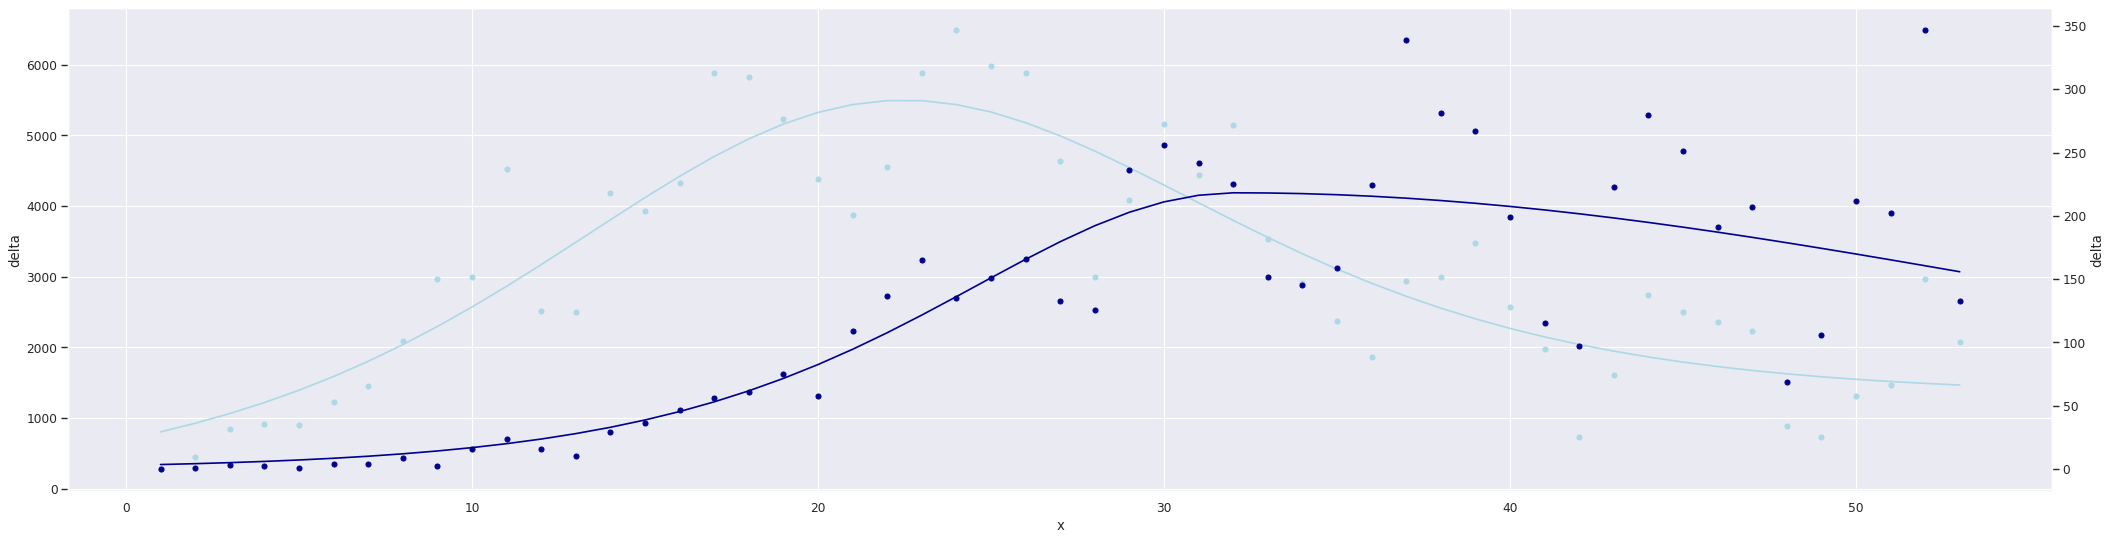

In [9]:
country_name, first_date, init_add = 'Germany', pd.to_datetime('2020-03-09'), 0.0
germany_mortality_analysis = covid19.MortalityAnalysis(country_name, first_date=first_date, init_add=init_add, df=df)  # df = alternative_germany_data
germany_mortality_analysis.fit()
germany_mortality_analysis.plot_infection_and_death_curves()

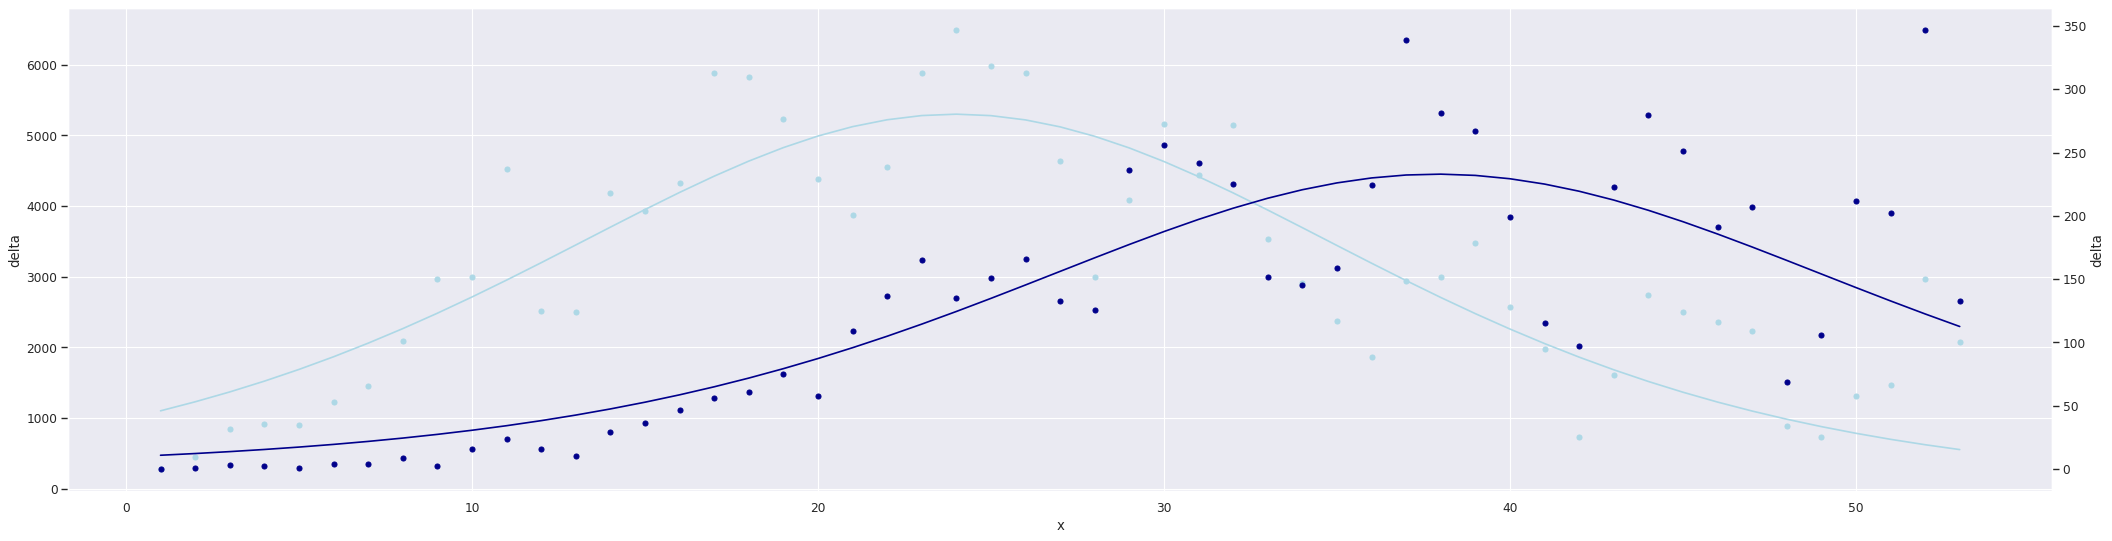

In [10]:
germany_mortality_analysis.ll.plot_lead_lag()

In [11]:
round(germany_mortality_analysis.ll.scale * 100.0,1),germany_mortality_analysis.ll.scale

(4.5, 0.0445740557171902)

In [12]:
germany_mortality_analysis.ll.shift

13.885731829223362

## CFR: Via Survival Analysis and Kaplan Meier

### Timeline of infection to death

* [Estimates of the severity of coronavirus disease 2019: a model-based analysis](https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30243-7/fulltext)
    * duration from onset of symptoms to death to be 17·8 days (95% credible interval [CrI] 16·9–19·2)
    * to hospital discharge to be 24·7 days (22·9–28·1).
* [Estimating SARS-COV-2 infections](https://observablehq.com/@danyx/estimating-sars-cov-2-infections)
    * it takes on average 23 days from infection to death.
    * ~5 days from infection to symptoms and ~18 days from symptoms to death so we arrive at a default value of 23 days from infection to death
* [Characteristics of COVID-19 patients dying in Italy Report based on available data on March 20th, 2020](https://www.epicentro.iss.it/coronavirus/bollettino/Report-COVID-2019_20_marzo_eng.pdf)
    * Median number of days between onset of symptoms to death: 8
    * Median number of days between onset of symptoms to hospitalization: 4
* [Clinical course and risk factors for mortality of adult inpatients with COVID-19 in Wuhan, China: a retrospective cohort study](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30566-3/fulltext)
    * Time from illness onset to hospital admission, days	11·0 (8·0–14·0)
* [Coronavirus: how quickly do COVID-19 symptoms develop and how long do they last?](https://patient.info/news-and-features/coronavirus-how-quickly-do-covid-19-symptoms-develop-and-how-long-do-they-last)
    * ~5 days from infection to symptoms


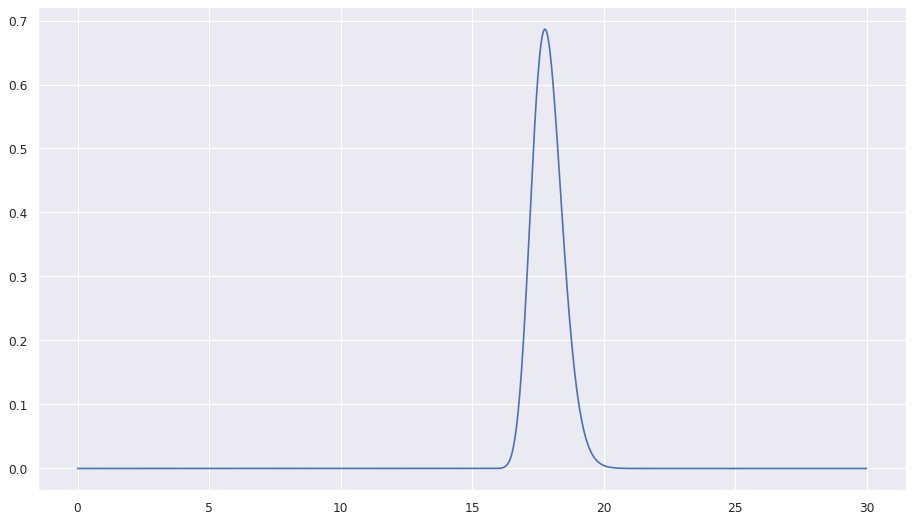

In [13]:
x = np.linspace(0.0,30.0,1000)
y = covid19.gamma_dist.pdf(x)
fig=plt.figure(figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.plot(x,y)

In [14]:
import rpy2
print(rpy2.__version__)
import rpy2.robjects.packages as rpackages
base = rpackages.importr('base')
print(base.R_Version().rx('version.string'))

import IPython.display
import rpy2, rpy2.robjects, rpy2.robjects.pandas2ri, rpy2.rinterface, rpy2.robjects.packages, rpy2.interactive, rpy2.robjects.lib.ggplot2, rpy2.robjects.lib.grdevices
rpy2.robjects.pandas2ri.activate()

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# R package names
packnames = ('LexisPlotR',)

# R vector of strings
from rpy2.robjects.vectors import StrVector

grdevices = rpy2.robjects.packages.importr('grDevices')
# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

lexis = rpackages.importr('LexisPlotR')
lexis_grid = rpy2.robjects.r['lexis.grid']
lexis_lifeline = rpy2.robjects.r['lexis.lifeline']

3.2.6
$version.string
[1] "R version 3.6.1 (2019-07-05)"




 /home/local/cs/local/install/anaconda3-5.3.1-Linux-x86_64/envs/py36ds/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning:pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
 /home/local/cs/local/install/anaconda3-5.3.1-Linux-x86_64/envs/py36ds/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning:pandas >= 1.0 is not supported.
 /home/local/cs/local/install/anaconda3-5.3.1-Linux-x86_64/envs/py36ds/lib/python3.6/site-packages/rpy2/robjects/lib/ggplot2.py:72: UserWarning:This was designed againt ggplot2 version 3.2.1 but you have 3.3.0


In [15]:
def plot_lexis(mortality_analysis_instance):
    mylexis = lexis_grid(year_start = 2020, year_end = 2021, age_start = 0, age_end = 1) #  lwd = 0.1

    alpha = 1.0
    ix_present = ~mortality_analysis_instance.df_lifelines_individual.observed_death
    ix_lost    = mortality_analysis_instance.df_lifelines_individual.observed_death
    mylexis = lexis_lifeline(lg = mylexis , entry = mortality_analysis_instance.df_lifelines_individual['start_date'][ix_present], exit = mortality_analysis_instance.df_lifelines_individual['end_date'][ix_present], colour = "orange", alpha = alpha, lwd = 0.4)
    mylexis = lexis_lifeline(lg = mylexis , entry = mortality_analysis_instance.df_lifelines_individual['start_date'][ix_lost]   , exit = mortality_analysis_instance.df_lifelines_individual['end_date'][ix_lost]   , colour = "blue"  , alpha = alpha, lwd = 0.4, lineends = True)

    with rpy2.robjects.lib.grdevices.render_to_bytesio(grdevices.png, width=1.5*1024, height=1.5*896, res=90) as img:
        rpy2.robjects.r.print(mylexis)   
    IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))

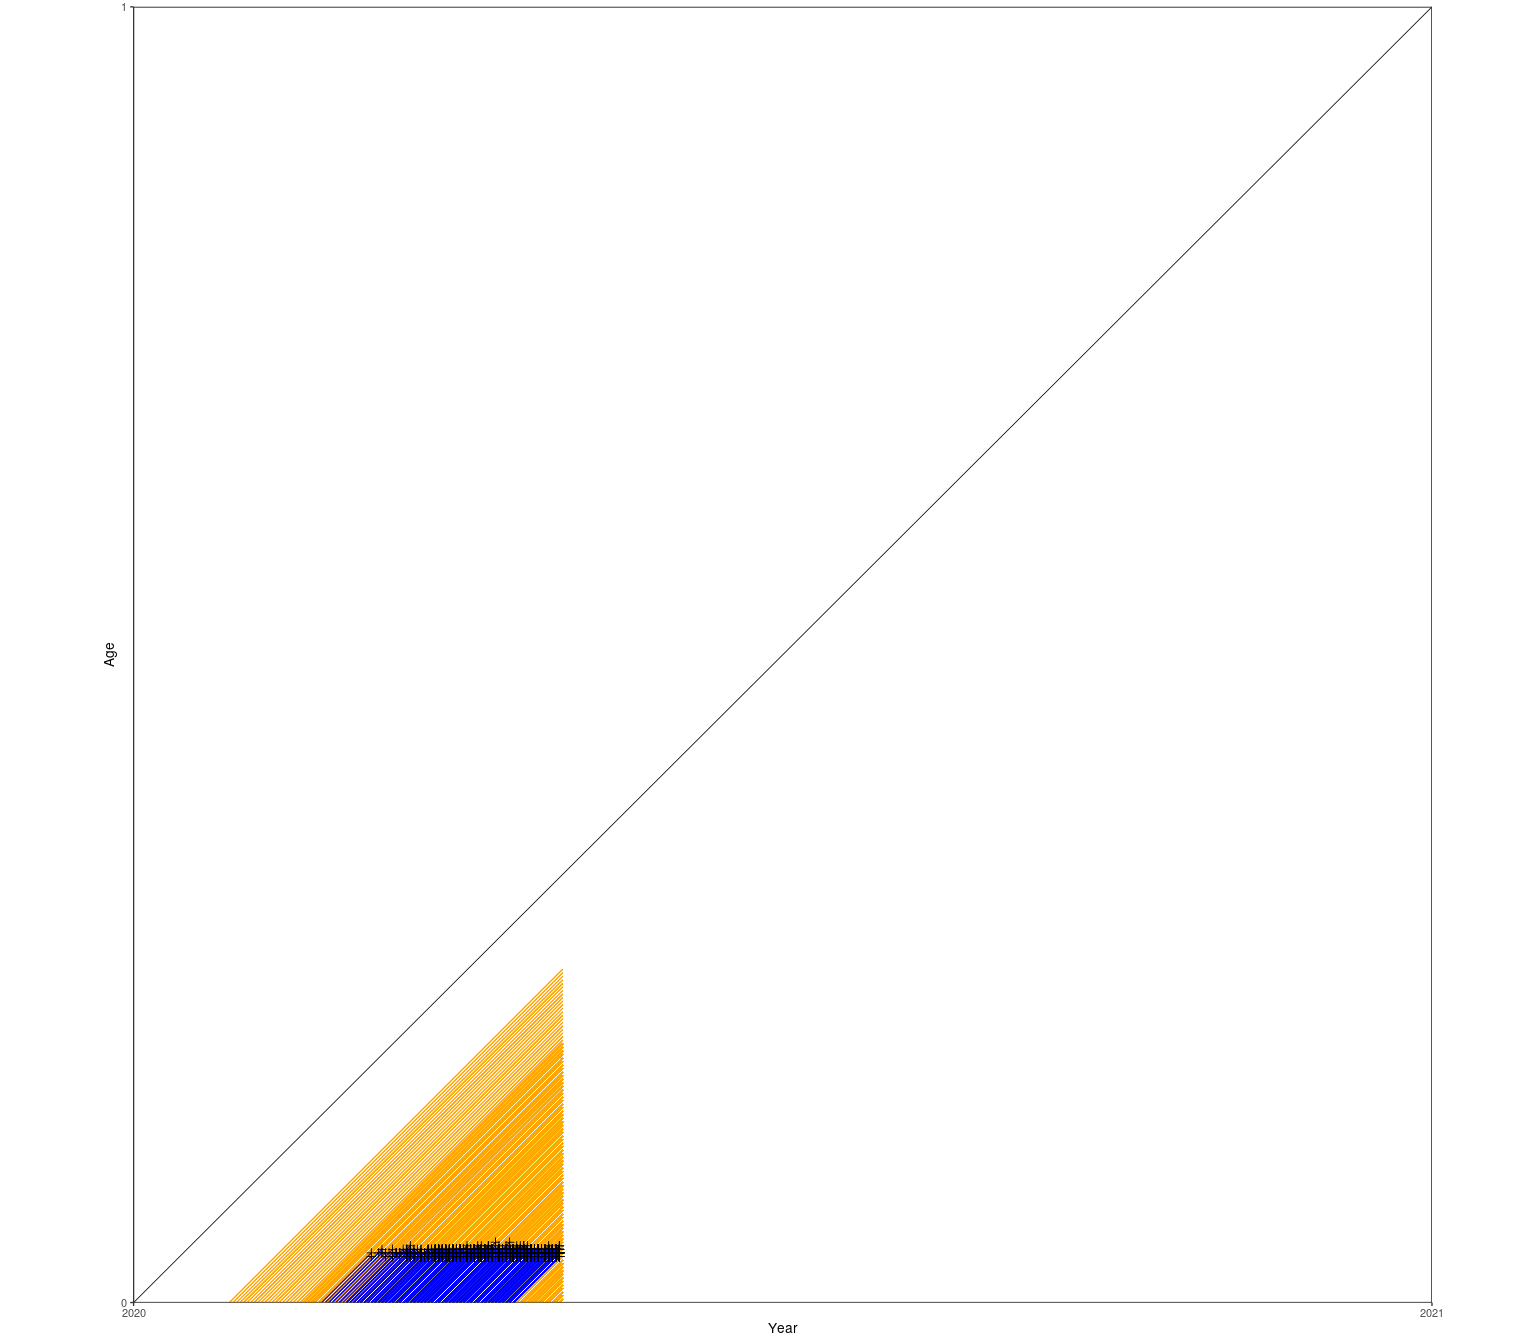

In [16]:
plot_lexis(germany_mortality_analysis)

CFR via Survival analysis: 4.79 (lower: 4.68, upper:4.9), CFR via shift and scale: 4.46 (time delay between infection and death: 13.89 days)


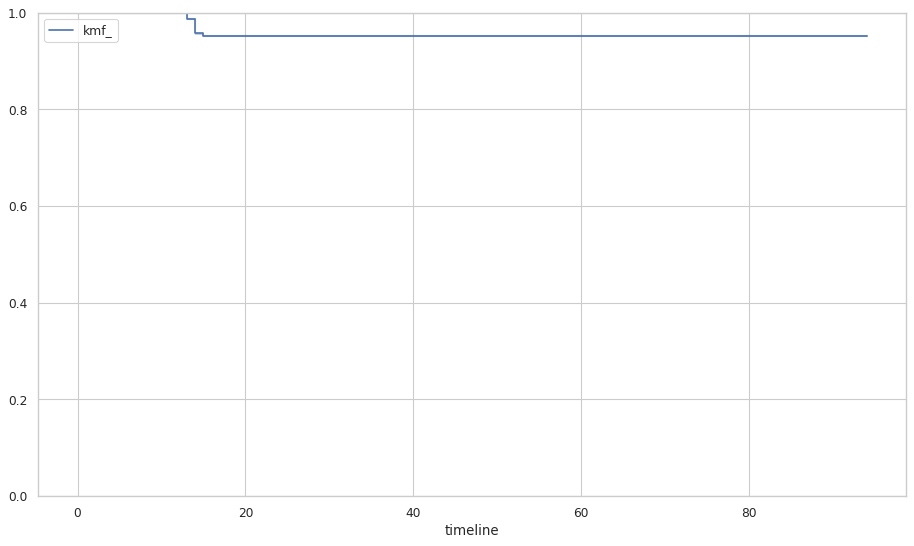

In [17]:
print(germany_mortality_analysis.print_death_rate())
germany_mortality_analysis.plot()

In [18]:
# Crude CFR 4.1 - 5.0
# via cohort: 4.3
# via shift and scale: 4.5
# via survival analysis: 4.8